# MVP Análise de Dados e Boas Práticas

Nome: Daniel Waissmann Szyfman

Matrícula: 4052024001726

Dataset: [Car Evaluation Dataset](https://archive.ics.uci.edu/dataset/19/car+evaluation)

# Introdução

A avaliação de veículos é uma etapa essencial para a tomada de decisão por parte de consumidores, fabricantes e concessionárias. O *Car Evaluation Dataset*, disponibilizado pela UCI Machine Learning Repository, oferece uma base estruturada para análise automatizada de atributos de veículos, permitindo classificar o quão aceitável é um carro com base em critérios técnicos e financeiros.

Este projeto tem como objetivo aplicar técnicas de análise exploratória e pré-processamento de dados para investigar padrões dentro deste dataset e preparar os dados para futuros modelos de machine learning. Utilizaremos a linguagem Python e bibliotecas como `pandas`, `numpy` e `seaborn`, sempre buscando adotar boas práticas de organização de código e narrativa interpretativa.

Ao longo deste notebook, buscarei construir um storytelling claro: desde a definição do problema até o tratamento dos dados. A intenção é não apenas preparar os dados tecnicamente, mas também gerar insights práticos sobre os critérios que influenciam na avaliação de um veículo, e como esses critérios se relacionam entre si.

# Definição do Problema

O objetivo deste trabalho é compreender os fatores que influenciam a avaliação de veículos com base em seus atributos técnicos e econômicos. O conjunto de dados utilizado traz características como preço de compra, número de portas, capacidade de carga e segurança, entre outras variáveis categóricas.

## Tipo de Problema

Estou lidando com um problema de **classificação supervisionada**, no qual cada instância representa um veículo com características específicas, e a variável de saída indica o nível de aceitabilidade desse carro. A variável alvo possui quatro possíveis categorias: `unacc`, `acc`, `good` e `vgood`.

O desafio é identificar como os atributos fornecidos contribuem para essa avaliação final e compreender os padrões que diferenciam carros mal avaliados daqueles considerados bons ou muito bons.


## Hipóteses

Antes de iniciar a análise detalhada, levantei algumas hipóteses que pretendo verificar ao longo do trabalho:

- Carros com maior capacidade de carga e mais portas tendem a ser melhor avaliados.
- Veículos com manutenção muito cara ou baixa segurança provavelmente são classificados negativamente.
- Pode haver combinações específicas entre segurança e preço de compra que afetam diretamente a avaliação, mesmo quando os demais atributos são favoráveis.
- A segurança pode ter maior peso na classificação do que o número de passageiros ou o tamanho do porta-malas.
- Veículos baratos com boa segurança podem ter avaliações boas mesmo com menor conforto.

Essas hipóteses servirão como base para guiar a análise exploratória e a interpretação dos dados.


## Seleção de Dados

O dataset escolhido foi o *Car Evaluation Dataset*, originalmente publicado no UCI Machine Learning Repository. A base contém apenas atributos categóricos, que representam diferentes aspectos técnicos e funcionais de um veículo, e é amplamente utilizada para tarefas de classificação.

A escolha foi motivada pela simplicidade estrutural, facilidade de entendimento e riqueza de combinações possíveis entre os atributos, o que permite uma análise interpretativa eficaz e um fluxo de pré-processamento direto.


## Atributos do Dataset

A base de dados é composta pelos seguintes atributos:

- **buying**: custo de compra (valores: vhigh, high, med, low)
- **maint**: custo de manutenção (valores: vhigh, high, med, low)
- **doors**: número de portas (valores: 2, 3, 4, 5more)
- **persons**: capacidade de pessoas (valores: 2, 4, more)
- **lug_boot**: tamanho do porta-malas (valores: small, med, big)
- **safety**: nível de segurança (valores: low, med, high)

A variável alvo (que representa a classificação final do veículo) é:

- **class**: avaliação final do carro (valores: unacc, acc, good, vgood)

Todos os atributos do conjunto de dados são **categóricos com ordenação natural**. Isso significa que, apesar de representados por strings, existe uma hierarquia implícita entre os valores de cada atributo. Essa característica será essencial no momento do pré-processamento, quando precisarei aplicar uma codificação que preserve essa ordem.



# Importação das Bibliotecas Necessárias e Carga de Dados

Nesta etapa, realizarei a importação das bibliotecas essenciais para análise, visualização e preparação dos dados. Também farei o carregamento inicial do dataset para dar início à exploração.

In [7]:
# Bibliotecas para manipulação e análise de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações opcionais para os gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [8]:
url = "https://raw.githubusercontent.com/Szyfman/MVP_Puc_Final/main/car.csv"

In [9]:
colunas = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=colunas)

In [10]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Análise dos Dados

Nesta seção, exploro o comportamento das variáveis do dataset com maior profundidade. Essa análise inclui verificações estruturais, estatísticas descritivas e visualizações. O objetivo é entender como os atributos se distribuem e se relacionam com a variável alvo, de modo a guiar as decisões de pré-processamento e reforçar (ou refutar) hipóteses levantadas anteriormente.


## Exploração Inicial dos Dados

Com o dataset carregado, agora farei uma exploração inicial para entender melhor sua estrutura, identificar tipos de variáveis, verificar valores únicos e checar se há dados ausentes. Essas informações são importantes para planejar o pré-processamento adequado mais adiante.

In [11]:
# Dimensão do dataset
print("Dimensão do dataset:", df.shape)

# Informações gerais sobre os tipos de dados
print("\nInformações sobre colunas:")
df.info()

# Verificação de valores nulos
print("\nTotal de valores ausentes por coluna:")
print(df.isnull().sum())

Dimensão do dataset: (1728, 7)

Informações sobre colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB

Total de valores ausentes por coluna:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [ ]:
# Verifico quantos valores únicos existem em cada coluna
print("Valores únicos por coluna:")
print(df.nunique())

# Frequência de valores por coluna (amostra)
for coluna in df.columns:
    print(f"\nDistribuição de valores em '{coluna}':")
    print(df[coluna].value_counts())

Valores únicos por coluna:
buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

Distribuição de valores em 'buying':
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Distribuição de valores em 'maint':
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Distribuição de valores em 'doors':
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

Distribuição de valores em 'persons':
persons
2       576
4       576
more    576
Name: count, dtype: int64

Distribuição de valores em 'lug_boot':
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

Distribuição de valores em 'safety':
safety
low     576
med     576
high    576
Name: count, dtype: int64

Distribuição de valores em 'class':
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


### Considerações iniciais

O dataset possui 1.728 registros e 7 variáveis, todas categóricas. Nenhum valor ausente foi identificado, o que elimina a necessidade de tratamento de dados faltantes nesta etapa. A análise preliminar também mostrou que os atributos de entrada possuem uma distribuição de valores bastante uniforme, o que contribui para manter a diversidade nas observações.

Por outro lado, a variável alvo (`class`) apresenta um desbalanceamento considerável: mais de 70% dos veículos foram classificados como `unacc`, enquanto as classes `good` e `vgood` aparecem com frequência muito menor. Essa discrepância pode ter impacto direto em análises futuras e deve ser levada em conta ao interpretar os padrões nos dados.

Essas observações iniciais fornecem uma boa base para seguir com as estatísticas descritivas e as visualizações, aprofundando a compreensão sobre os comportamentos e relações entre as variáveis.


## Estatísticas Descritivas

Nesta etapa, aprofundo a análise das variáveis do dataset com base em frequências absolutas, relativas e tabelas cruzadas com a variável alvo. Como todos os atributos são categóricos com ordenação natural, esse tipo de investigação ajuda a reforçar ou questionar hipóteses levantadas anteriormente, além de indicar padrões que poderão ser explorados visualmente a seguir.

In [13]:
# Frequência absoluta por atributo
for coluna in df.columns[:-1]:  # ignora 'class'
    print(f"Frequência absoluta de '{coluna}':")
    print(df[coluna].value_counts())
    print()

# Frequência relativa por atributo (%)
for coluna in df.columns[:-1]:
    print(f"Frequência relativa (%) de '{coluna}':")
    print((df[coluna].value_counts(normalize=True) * 100).round(2))
    print()

Frequência absoluta de 'buying':
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Frequência absoluta de 'maint':
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Frequência absoluta de 'doors':
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

Frequência absoluta de 'persons':
persons
2       576
4       576
more    576
Name: count, dtype: int64

Frequência absoluta de 'lug_boot':
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

Frequência absoluta de 'safety':
safety
low     576
med     576
high    576
Name: count, dtype: int64

Frequência relativa (%) de 'buying':
buying
vhigh    25.0
high     25.0
med      25.0
low      25.0
Name: proportion, dtype: float64

Frequência relativa (%) de 'maint':
maint
vhigh    25.0
high     25.0
med      25.0
low      25.0
Name: proportion, dtype: float64

Frequência relativa (%) de 'doors':
doors
2        25.0
3      

Os resultados mostram que todos os atributos apresentam uma distribuição uniforme entre suas categorias. Isso reforça a ideia de que o dataset foi construído de forma balanceada, sem favorecimento de determinados valores.

Essa uniformidade contribui para uma análise mais confiável, pois evita que padrões sejam mascarados por distribuições enviesadas. Isso significa que a influência de cada atributo sobre a variável alvo dependerá, de fato, de suas combinações e não da frequência bruta.

In [14]:
# Relação entre cada atributo e a variável alvo (class)
for coluna in df.columns[:-1]:
    print(f"Cruzamento entre '{coluna}' e 'class':")
    print(pd.crosstab(df[coluna], df['class'], margins=True))
    print()

Cruzamento entre 'buying' e 'class':
class   acc  good  unacc  vgood   All
buying                               
high    108     0    324      0   432
low      89    46    258     39   432
med     115    23    268     26   432
vhigh    72     0    360      0   432
All     384    69   1210     65  1728

Cruzamento entre 'maint' e 'class':
class  acc  good  unacc  vgood   All
maint                               
high   105     0    314     13   432
low     92    46    268     26   432
med    115    23    268     26   432
vhigh   72     0    360      0   432
All    384    69   1210     65  1728

Cruzamento entre 'doors' e 'class':
class  acc  good  unacc  vgood   All
doors                               
2       81    15    326     10   432
3       99    18    300     15   432
4      102    18    292     20   432
5more  102    18    292     20   432
All    384    69   1210     65  1728

Cruzamento entre 'persons' e 'class':
class    acc  good  unacc  vgood   All
persons                    

### Relações entre os atributos e a variável alvo

As tabelas cruzadas revelam associações bastante relevantes entre os atributos de entrada e a variável alvo:

- O atributo `buying` mostra que veículos com custo de compra `vhigh` são quase exclusivamente classificados como `unacc`, enquanto os com valor `low` ou `med` apresentam maior diversidade de avaliação, inclusive nas classes positivas (`good` e `vgood`).

- Em `maint`, o padrão é semelhante: valores `vhigh` estão fortemente ligados a rejeição. Já valores `low` e `med` têm maior chance de aparecer em avaliações positivas.

- O atributo `persons` é particularmente interessante. Veículos com capacidade para apenas 2 pessoas são sempre classificados como `unacc`, o que sugere que a capacidade mínima é um fator decisivo. As categorias `4` e `more` distribuem-se melhor entre as classes.

- Em `safety`, o padrão é ainda mais marcante: todos os veículos com `low` segurança são `unacc`, enquanto `high` segurança concentra a totalidade da classe `vgood` e boa parte dos veículos `good`.

- `lug_boot` e `doors` têm impacto mais sutil, mas ainda observável: `lug_boot = small` aparece muito mais em veículos rejeitados, enquanto `big` e `med` têm maior distribuição entre classes positivas.

Essas observações indicam que atributos como segurança, capacidade de pessoas e custo estão fortemente associados à avaliação final. Essas relações serão representadas graficamente na próxima etapa, para facilitar ainda mais sua interpretação.


## Visualizações

Com base nas análises estatísticas anteriores, identifiquei padrões relevantes entre os atributos de entrada e a variável alvo. Agora, passo a representar graficamente essas relações, com o objetivo de facilitar a interpretação visual dos dados e avaliar de forma mais clara o impacto de cada variável na classificação final dos veículos.

As visualizações servirão como apoio para validar ou questionar as hipóteses levantadas no início do trabalho, como a influência da segurança na avaliação, o papel do custo e da capacidade de passageiros, além da possível menor relevância de atributos como o tamanho do porta-malas.

Ao longo desta etapa, construirei gráficos individuais e combinados, sempre buscando destacar os padrões mais expressivos do conjunto de dados.


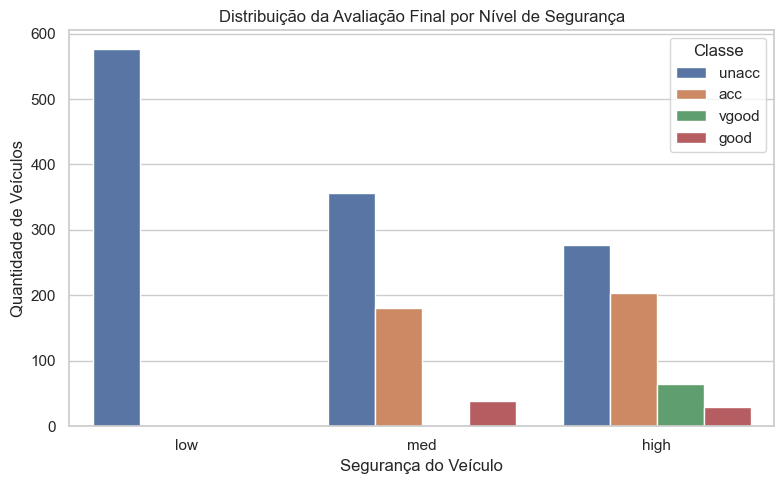

In [15]:
# Gráfico de barras: distribuição de classes por nível de segurança
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='safety', hue='class', order=['low', 'med', 'high'])

plt.title('Distribuição da Avaliação Final por Nível de Segurança')
plt.xlabel('Segurança do Veículo')
plt.ylabel('Quantidade de Veículos')
plt.legend(title='Classe')
plt.tight_layout()
plt.show()

### Relação entre Segurança e Avaliação Final

A visualização reforça fortemente a hipótese de que o nível de segurança do veículo é um dos fatores mais determinantes para sua avaliação final.

Veículos com segurança `low` são praticamente todos classificados como `unacc`, o que indica uma rejeição absoluta a esse perfil. Já veículos com `safety = med` ainda apresentam uma presença expressiva na classe `unacc`, mas também começam a aparecer nas classes `acc` e, em menor escala, `good`.

A mudança mais significativa ocorre com `safety = high`, onde há uma inversão no padrão: há redução nos casos de `unacc`, crescimento considerável de `acc` e o surgimento mais evidente das classes `good` e `vgood`.

Esse comportamento confirma que a segurança está positivamente correlacionada com a qualidade percebida do veículo. Esse será um padrão importante a considerar nas próximas análises visuais e, futuramente, na preparação para modelos.


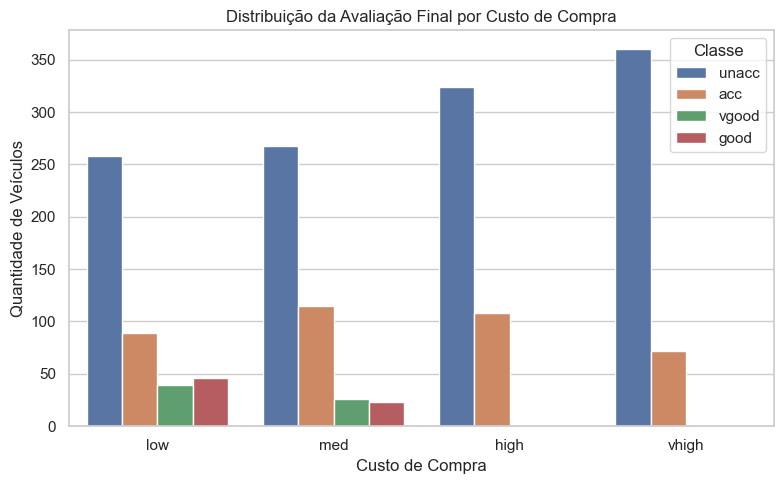

In [16]:
# Gráfico de barras: distribuição de classes por nível de custo de compra
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='buying', hue='class', order=['low', 'med', 'high', 'vhigh'])

plt.title('Distribuição da Avaliação Final por Custo de Compra')
plt.xlabel('Custo de Compra')
plt.ylabel('Quantidade de Veículos')
plt.legend(title='Classe')
plt.tight_layout()
plt.show()


### Relação entre Custo de Compra e Avaliação Final

O gráfico revela uma relação inversa entre o custo de compra e a avaliação do veículo. Veículos com `buying = vhigh` concentram quase totalmente os casos na classe `unacc`, indicando que o alto custo de aquisição está fortemente associado à rejeição.

À medida que o custo diminui (`high`, `med` e `low`), observam-se mais ocorrências nas classes `acc`, `good` e `vgood`. O grupo com custo `low` é o que apresenta maior diversidade nas avaliações, inclusive com a presença notável de `vgood`.

Esse padrão reforça a hipótese de que o custo elevado, quando não compensado por outros atributos relevantes, tende a impactar negativamente a avaliação final. Mostra também que valores mais acessíveis favorecem melhores classificações, especialmente quando associados a características positivas como boa segurança ou maior capacidade de passageiros.


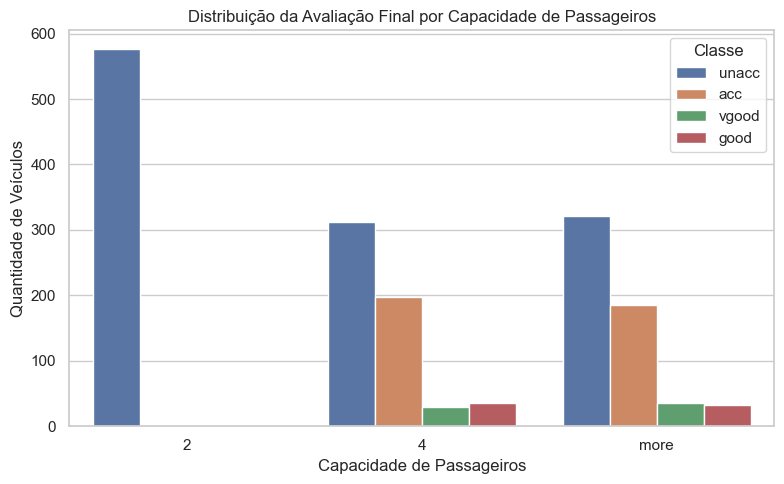

In [17]:
# Gráfico de barras: distribuição de classes por capacidade de passageiros
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='persons', hue='class', order=['2', '4', 'more'])

plt.title('Distribuição da Avaliação Final por Capacidade de Passageiros')
plt.xlabel('Capacidade de Passageiros')
plt.ylabel('Quantidade de Veículos')
plt.legend(title='Classe')
plt.tight_layout()
plt.show()


### Relação entre Capacidade de Passageiros e Avaliação Final

O gráfico revela um padrão bastante claro: veículos com capacidade para apenas duas pessoas são classificados exclusivamente como `unacc`. Não há nenhuma ocorrência dessas unidades nas demais classes, o que sugere uma penalização direta pela baixa capacidade de ocupação.

A partir da categoria `4`, já se observa uma distribuição mais variada, com crescimento expressivo na classe `acc` e presença de `good` e `vgood`. Esse padrão se mantém para a categoria `more`, que agrupa veículos com maior capacidade, reforçando a ideia de que esse atributo está associado a avaliações mais positivas.

Essa visualização valida a hipótese de que veículos mais espaçosos são considerados mais vantajosos, possivelmente por atenderem melhor a perfis familiares ou de transporte coletivo. A ausência de variação nas categorias mais baixas também indica um forte critério eliminatório baseado nesse atributo.


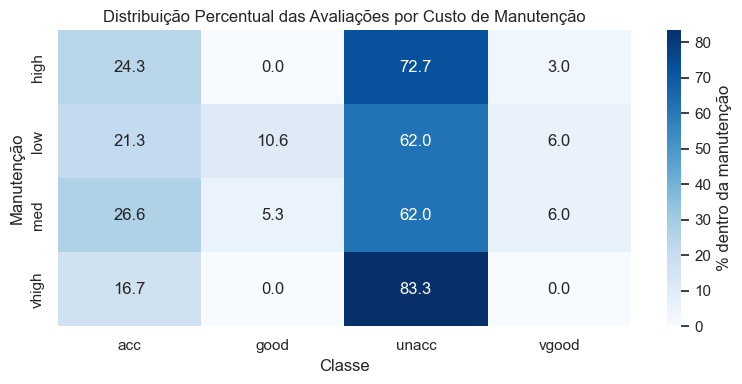

In [18]:
# Tabela cruzada normalizada por linha (proporção de cada avaliação por tipo de manutenção)
crosstab_maint = pd.crosstab(df['maint'], df['class'], normalize='index') * 100

# Criação do heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(crosstab_maint, annot=True, cmap='Blues', fmt='.1f', cbar_kws={'label': '% dentro da manutenção'})

plt.title('Distribuição Percentual das Avaliações por Custo de Manutenção')
plt.xlabel('Classe')
plt.ylabel('Manutenção')
plt.tight_layout()
plt.show()


### Distribuição Percentual das Avaliações por Custo de Manutenção

O heatmap mostra com clareza o impacto do custo de manutenção na avaliação final dos veículos. A categoria `vhigh` apresenta o maior percentual de classificações como `unacc` (83,3%), sem nenhuma ocorrência nas classes `good` ou `vgood`. Esse comportamento reforça a hipótese de que valores de manutenção muito elevados comprometem fortemente a aceitação do veículo.

Em contrapartida, os grupos com manutenção `low` ou `med` apresentam proporções mais equilibradas. Embora a classe `unacc` ainda seja majoritária, já surgem avaliações positivas, especialmente na classe `good`, que aparece exclusivamente nesses dois grupos.

A categoria `high` também é dominada por `unacc`, mas com uma leve melhora em relação à `vhigh`, sugerindo um efeito de gradação. Esses dados indicam que a manutenção não apenas influencia, mas funciona como um fator eliminatório quando associada aos níveis mais altos de custo.


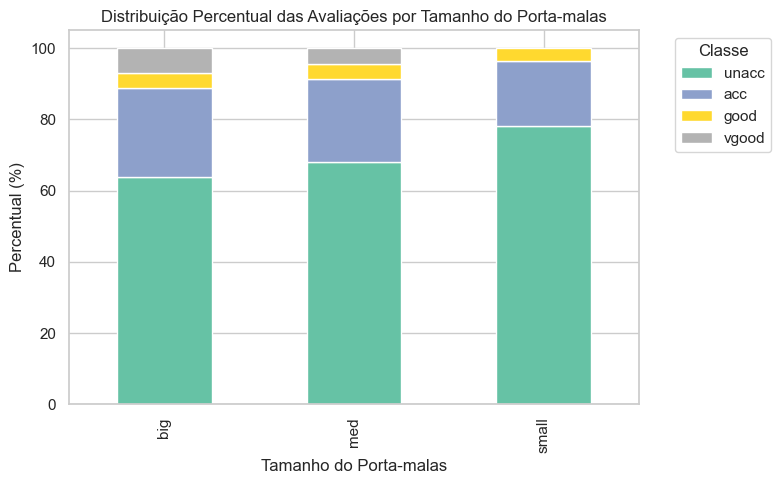

In [19]:
# Tabela de proporções por categoria de lug_boot
crosstab_lug = pd.crosstab(df['lug_boot'], df['class'], normalize='index') * 100
crosstab_lug = crosstab_lug[['unacc', 'acc', 'good', 'vgood']]  # garante ordem

# Criação do gráfico de barras empilhadas
crosstab_lug.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 5))

plt.title('Distribuição Percentual das Avaliações por Tamanho do Porta-malas')
plt.xlabel('Tamanho do Porta-malas')
plt.ylabel('Percentual (%)')
plt.legend(title='Classe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Distribuição Percentual das Avaliações por Tamanho do Porta-malas

O gráfico mostra que o tamanho do porta-malas possui um impacto relativamente limitado na avaliação final dos veículos. Em todas as três categorias (`small`, `med`, `big`), a classe `unacc` continua sendo a mais prevalente, com pequenas variações entre elas.

Notam-se leves melhorias na proporção de avaliações positivas (`good` e `vgood`) conforme o tamanho aumenta. A categoria `small` apresenta o maior percentual de rejeição (cerca de 77%), enquanto `big` apresenta ligeiro aumento nas classes superiores. No entanto, essa diferença é sutil em comparação com outras variáveis analisadas.

Esses dados sustentam a hipótese de que o porta-malas é um atributo secundário no processo de avaliação, funcionando mais como um critério complementar do que determinante. Sua influência parece ser modesta frente a fatores como segurança, custo e capacidade de passageiros.


C:\Users\madeinweb\AppData\Local\Temp\ipykernel_11328\290394709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', order=['unacc', 'acc', 'good', 'vgood'], palette='pastel')


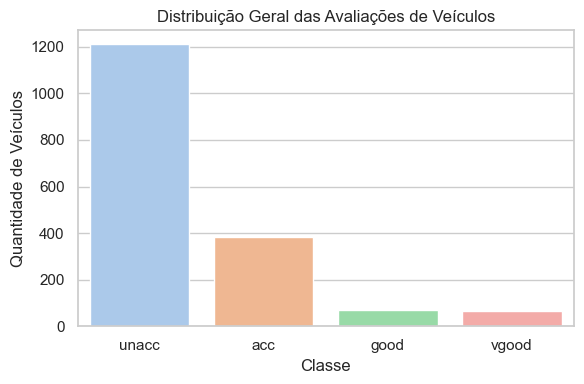

In [20]:
# Gráfico de barras para a distribuição da variável alvo (class)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class', order=['unacc', 'acc', 'good', 'vgood'], palette='pastel')

plt.title('Distribuição Geral das Avaliações de Veículos')
plt.xlabel('Classe')
plt.ylabel('Quantidade de Veículos')
plt.tight_layout()
plt.show()


### Distribuição Geral da Avaliação dos Veículos

A visualização final da análise exploratória mostra uma forte assimetria na variável alvo. A classe `unacc` domina expressivamente o conjunto de dados, concentrando mais de 1.200 registros entre os 1.728 totais. Isso representa mais de 70% do dataset, enquanto as classes `good` e `vgood` somadas representam menos de 10%.

Esse desbalanceamento terá impacto direto em qualquer estratégia de modelagem ou avaliação de desempenho. A depender do objetivo futuro, poderá ser necessário aplicar técnicas de balanceamento ou ajustar as métricas para refletir esse cenário.

Essa visão global complementa as análises anteriores e ajuda a consolidar a interpretação de que o dataset favorece perfis de rejeição, o que pode indicar critérios de avaliação rigorosos ou prioridades específicas na base original.


### Considerações Finais sobre a Análise dos Dados

Ao longo da análise exploratória, investiguei a estrutura e o comportamento dos dados em diferentes níveis. Iniciei pela verificação da integridade do dataset, confirmei a ausência de valores nulos e identifiquei que todos os atributos são categóricos com ordenação natural.

Em seguida, explorei estatisticamente as variáveis e avaliei suas relações com a variável alvo. Através de visualizações direcionadas, consegui validar diversas hipóteses formuladas no início do projeto:

- Atributos como `safety`, `persons` e `buying` mostraram impacto direto na avaliação final dos veículos.
- O custo de manutenção (`maint`) também demonstrou influência significativa, principalmente nos níveis mais altos.
- Já o atributo `lug_boot` (porta-malas) apresentou comportamento mais neutro, com variações discretas entre as categorias.

A última visualização revelou um importante ponto de atenção: o desbalanceamento da variável alvo, com predominância da classe `unacc`. Esse fator será levado em consideração na próxima etapa, dedicada ao pré-processamento dos dados, onde aplicarei as transformações necessárias para tornar o conjunto mais adequado a futuras análises ou modelagens.
